# Analisi

In questo caso abbiamo tenuta fissa l'evaporazione a 0.21 ed abbiamo fatto variare k tra 0 e 1 a passi di 0.25. Inoltre ks e kd variano:
- ks tra 0.5 e 6.5 a passi di 1
- kd tra 0 e 6 a passi di 0.5

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import pandas as pd
import matplotlib
import seaborn as sn

In [0]:
from google.colab import drive
drive.mount('/content/Drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/Drive


In [0]:
!cp -r /content/Drive/My\ Drive/CrowdControl/* /content/

**Il file ha le seguenti colonne in questo ordine**:

cpt  kd  ks   cycle   number_of_people   seed

cpt: numero iterazione della simulazione con medesimi parametri, da 0 a 11
kd e ks valore dei parametri

cycle: ciclo al quale sono usciti tutti gli agenti

number_of_people: quanta gente è rimasta dentro. Diverso da zero se dopo 2000 cicli non sono usciti tutti

seed: seme numeri random

In [0]:
ll Dati/ks_Vs_kd_ev_fixed/

total 204
-rw------- 1 root 203626 Apr  8 10:21 ks_vs_kd_evapo_fix.txt
-rw------- 1 root    103 Apr  8 10:21 Note.txt


# Evaporazione

## Evaporazione Costante

In [0]:
# non carico l'ultima colonna colonna con il seed
path = './Dati/ks_Vs_kd_ev_fixed/ks_vs_kd_evapo_fix.txt'
data = np.loadtxt(path, delimiter=' ')#, usecols = (0,1,2,3,4,6))
data = pd.DataFrame(data = data, columns = ['cpt', 'kd', 'ks', 'cycle', 'n_people', 'seed'])

In [0]:
type(data)

pandas.core.frame.DataFrame

In [0]:
data.head(5)

,cpt,kd,ks,cycle,n_people,seed
0,0.0,0.0,0.0,2000.0,659.0,7.689943e+18
1,1.0,0.0,0.0,2000.0,633.0,3.602029e+18
2,2.0,0.0,0.0,2000.0,646.0,7.107085e+18
3,3.0,0.0,0.0,2000.0,656.0,8.239499e+18
4,4.0,0.0,0.0,2000.0,671.0,6.480552e+18


In [0]:
cmap = matplotlib.cm.get_cmap('coolwarm')

In [0]:
means_kd = data.groupby(by = ['kd', 'ks']).mean()
std_devs_kd = data.groupby(by = ['kd', 'ks']).std()

kds = list(means_kd.index.levels[0])
kss = list(means_kd.index.levels[1])

colors = cmap(kds/np.max(kds))

F , axes = plt.subplots(3,1,figsize=(20,30))

for i in range(0,len(kds),4):
    axes[0].errorbar(kss,means_kd['cycle'][kds[i]],yerr=std_devs_kd['cycle'][kds[i]],ecolor=[colors[i]],fmt='None',label=None)
    axes[0].plot(kss,means_kd['cycle'][kds[i]],'-o', label = 'kd ='+str(kds[i]),c=colors[i])
    
    axes[1].plot(kss,std_devs_kd['cycle'][kds[i]],'-o', label = 'kd ='+str(kds[i]),c=colors[i])
    
    
fontsize=20
axes[0].set_xlabel('ks', fontsize = fontsize)
axes[0].set_ylabel('Exit time', fontsize = fontsize)
axes[0].legend(prop={'size': fontsize})
axes[0].grid()

axes[1].set_xlabel('ks', fontsize = fontsize)
axes[1].set_ylabel('Variance', fontsize = fontsize)
axes[1].legend(prop={'size': fontsize})
axes[1].grid()
        
sn.boxplot(x = 'ks',y='cycle',data=std_devs_kd.reset_index(),palette='bright',ax=axes[2])

axes[2].set_xlabel('ks', fontsize = fontsize)
axes[2].set_ylabel('Variance', fontsize = fontsize)
axes[2].grid()


In [0]:
# tabelle in cui raggruppo come si vede printato nel comando successivo

means_ks = data.groupby(by = ['ks', 'kd']).mean()
std_devs_ks = data.groupby(by = ['ks', 'kd']).std()

colors = cmap(kss/np.max(kss))

F , axes = plt.subplots(2,1,figsize=(20,20))

for i in [0,1,2,3,4,8,-6,-1]:
    axes[0].errorbar(kds,means_ks['cycle'][kss[i]],yerr=std_devs_ks['cycle'][kss[i]],ecolor=[colors[i]],fmt='None',label=None)
    axes[0].plot(kds,means_ks['cycle'][kss[i]],'-o', label = 'ks ='+str(kss[i]),c=colors[i])
    
    axes[1].plot(kds,std_devs_ks['cycle'][kss[i]],'-o', label = 'ks ='+str(kss[i]),c=colors[i])
    
fontsize=20
axes[0].set_xlabel('kd', fontsize = fontsize)
axes[0].set_ylabel('exit time', fontsize = fontsize)
axes[0].legend(loc=2,prop={'size': fontsize})
axes[0].grid()

axes[1].set_xlabel('kd', fontsize = fontsize)
axes[1].set_ylabel('Variance', fontsize = fontsize)
axes[1].legend(loc=2,prop={'size': fontsize})
axes[1].grid()

## evap con fz

In [0]:
# non carico l'ultima colonna colonna con il seed
path = './Dati/kd_Vs_ks_ev_fz/ks_vs_kd_totale.txt'
data = loadtxt(path, delimiter=' ')#, usecols = (0,1,2,3,4,6))
data = pd.DataFrame(data = data, columns = ['cpt', 'kd', 'ks', 'cycle', 'n_people', 'seed'])
data.head()

,cpt,kd,ks,cycle,n_people,seed
0,0.0,0.0,0.0,2000.0,652.0,7.285701e+17
1,1.0,0.0,0.0,2000.0,647.0,5.583399e+18
2,2.0,0.0,0.0,2000.0,659.0,9.882830e+17
3,3.0,0.0,0.0,2000.0,663.0,6.560422e+18
4,4.0,0.0,0.0,2000.0,634.0,7.388218e+18


In [0]:
means_kd = data.groupby(by = ['kd', 'ks']).mean()
std_devs_kd = data.groupby(by = ['kd', 'ks']).std()

kds = list(means_kd.index.levels[0])
kss = list(means_kd.index.levels[1])

colors = cmap(kds/np.max(kds))

F , axes = subplots(3,1,figsize=(20,30))

for i in range(len(kds),2):
    axes[0].errorbar(kss,means_kd['cycle'][kds[i]],yerr=std_devs_kd['cycle'][kds[i]],ecolor=[colors[i]],fmt='None',label=None)
    axes[0].plot(kss,means_kd['cycle'][kds[i]],'-o', label = 'kd ='+str(kds[i]),c=colors[i])
    
    axes[1].plot(kss,std_devs_kd['cycle'][kds[i]],'-o', label = 'kd ='+str(kds[i]),c=colors[i])
    
    
axes[0].set_xlabel('ks', fontsize = 50)
axes[0].set_ylabel('exit time', fontsize = 50)
axes[0].legend(prop={'size': 10})
axes[0].grid()

axes[1].set_xlabel('ks', fontsize = 50)
axes[1].set_ylabel('Variance', fontsize = 50)
axes[1].legend(prop={'size': 10})
axes[1].grid()
        
sn.boxplot(x = 'ks',y='cycle',data=std_devs_kd.reset_index(),palette='bright',ax=axes[2])

axes[2].set_xlabel('ks', fontsize = 50)
axes[2].set_ylabel('Variance', fontsize = 50)
axes[2].grid()


In [0]:
# tabelle in cui raggruppo come si vede printato nel comando successivo

means_ks = data.groupby(by = ['ks', 'kd']).mean()
std_devs_ks = data.groupby(by = ['ks', 'kd']).std()

colors = cmap(kss/np.max(kss))

F , axes = subplots(2,1,figsize=(20,20))

for i in range(len(kss)):
    axes[0].errorbar(kds,means_ks['cycle'][kss[i]],yerr=std_devs_ks['cycle'][kss[i]],ecolor=[colors[i]],fmt='None',label=None)
    axes[0].plot(kds,means_ks['cycle'][kss[i]],'-o', label = 'ks ='+str(kss[i]),c=colors[i])
    
    axes[1].plot(kds,std_devs_ks['cycle'][kss[i]],'-o', label = 'ks ='+str(kss[i]),c=colors[i])
    
    
axes[0].set_xlabel('kd', fontsize = 50)
axes[0].set_ylabel('exit time', fontsize = 50)
axes[0].legend(loc=2,prop={'size': 10})
axes[0].grid()

axes[1].set_xlabel('kd', fontsize = 50)
axes[1].set_ylabel('Variance', fontsize = 50)
axes[1].legend(loc=2,prop={'size': 10})
axes[1].grid()

# Bet

## Bet fixed

In [0]:
# non carico l'ultima colonna colonna con il seed
path = './Dati/ks_Vs_ks_Vs_k/ks_vs_kd_vs_k.txt'
data = np.loadtxt(path, delimiter=' ', usecols = (0,1,2,3,4,6))
data = pd.DataFrame(data = data, columns = ['cpt', 'kd', 'ks', 'cycle', 'n_people', 'k'])

# arrotondo k alla seconda cifra decimale
data.k = data.k.round(2)
data.head()

,cpt,kd,ks,cycle,n_people,k
0,0.0,0.0,0.5,1495.0,0.0,0.0
1,1.0,0.0,0.5,1624.0,0.0,0.0
2,2.0,0.0,0.5,1525.0,0.0,0.0
3,3.0,0.0,0.5,1591.0,0.0,0.0
4,4.0,0.0,0.5,1315.0,0.0,0.0


In [0]:
means_kd = data.groupby(by = ['kd', 'k','ks']).mean()
std_devs_kd = data.groupby(by = ['kd', 'k','ks']).std()

kds = list(means_kd.index.levels[0])
kss = list(means_kd.index.levels[2])
bets = list(means_kd.index.levels[1])

colors = cmap(kds/np.max(kds))

F , axes = plt.subplots(3*5,1,figsize=(20,150))

for i in range(len(bets)):
    for j in range(0,len(kds),4):
        axes[i*3].errorbar(kss,
                         means_kd['cycle'][kds[j]][bets[i]],
                         yerr=std_devs_kd['cycle'][kds[j]][bets[i]],
                         ecolor=[colors[j]],fmt='None',
                         label=None)
        axes[i*3].plot(kss,
                     means_kd['cycle'][kds[j]][bets[i]],
                     '-o',
                     label = 'kd ='+str(kds[j])+' k = '+str(bets[i]),
                     c=colors[j])
        
        axes[i*3+1].plot(kss,
                     std_devs_kd['cycle'][kds[j]][bets[i]],
                     '-o', 
                     label = 'kd ='+str(kds[j])+' k = '+str(bets[i]),
                     c=colors[j])
    
    fontsize = 20
    axes[i*3].set_xlabel('ks', fontsize = fontsize)
    axes[i*3].set_ylabel('exit time', fontsize = fontsize)
    axes[i*3].legend(prop={'size': fontsize})
    axes[i*3].grid()

    axes[i*3+1].set_xlabel('ks', fontsize = fontsize)
    axes[i*3+1].set_ylabel('Variance', fontsize = fontsize)
    axes[i*3+1].legend(prop={'size': fontsize})
    axes[i*3+1].grid()
        
    sn.boxplot(x = 'ks',y='cycle',
               data=std_devs_kd.reset_index()[std_devs_kd.reset_index()['k']==bets[i]],
               palette='bright',ax=axes[i*3+2])

    axes[i*3+2].set_xlabel('ks', fontsize = fontsize)
    axes[i*3+2].grid()


In [0]:
# non carico l'ultima colonna colonna con il seed
path = './Dati/ks_Vs_ks_Vs_k/ks_vs_kd_vs_k.txt'
data = np.loadtxt(path, delimiter=' ', usecols = (0,1,2,3,4,6))
data = pd.DataFrame(data = data, columns = ['cpt', 'kd', 'ks', 'cycle', 'n_people', 'k'])
# arrotondo k alla seconda cifra decimale
data.k = data.k.round(2)
data.head()


,cpt,kd,ks,cycle,n_people,k
0,0.0,0.0,0.5,1495.0,0.0,0.0
1,1.0,0.0,0.5,1624.0,0.0,0.0
2,2.0,0.0,0.5,1525.0,0.0,0.0
3,3.0,0.0,0.5,1591.0,0.0,0.0
4,4.0,0.0,0.5,1315.0,0.0,0.0


In [0]:
means_ks = data.groupby(by = ['ks', 'k','kd']).mean()
std_devs_ks = data.groupby(by = ['ks', 'k','kd']).std()

kds = list(means_ks.index.levels[2])
kss = list(means_ks.index.levels[0])
bets = list(means_ks.index.levels[1])

colors = cmap(kss/np.max(kss))

F , axes = plt.subplots(2*5,1,figsize=(20,150))

for i in range(len(bets)):
    for j in range(len(kss)):
        axes[i*2].errorbar(kds,
                         means_ks['cycle'][kss[j]][bets[i]],
                         yerr=std_devs_ks['cycle'][kss[j]][bets[i]],
                         ecolor=[colors[j]],fmt='None',
                         label=None)
        axes[i*2].plot(kds,
                     means_ks['cycle'][kss[j]][bets[i]],
                     '-o',
                     label = 'ks ='+str(kss[j])+' k = '+str(bets[i]),
                     c=colors[j])
        
        axes[i*2+1].plot(kds,
                     std_devs_ks['cycle'][kss[j]][bets[i]],
                     '-o', 
                     label = 'ks ='+str(kss[j])+' k = '+str(bets[i]),
                     c=colors[j])
    
    fontsize = 20
    axes[i*2].set_xlabel('kd', fontsize = fontsize)
    axes[i*2].set_ylabel('exit time', fontsize = fontsize)
    axes[i*2].legend(prop={'size': fontsize})
    axes[i*2].grid()

    axes[i*2+1].set_xlabel('kd', fontsize = fontsize)
    axes[i*2+1].set_ylabel('Variance', fontsize = fontsize)
    axes[i*2+1].legend(prop={'size': fontsize})
    axes[i*2+1].grid()

## kd fissato 

In [0]:

means_kd = data.groupby(by = ['kd', 'k','ks']).mean()
std_devs_kd = data.groupby(by = ['kd', 'k','ks']).std()

kds = list(means_kd.index.levels[0])
kss = list(means_kd.index.levels[2])
bets = list(means_kd.index.levels[1])

colors = cmap(bets/np.max(bets))

F , axes = plt.subplots(len(kds)*2,1,figsize=(20,250))

for i in range(len(kds)):
    for j in range(len(bets)):
        axes[i*2].errorbar(kss,
                         means_kd['cycle'][kds[i]][bets[j]],
                         yerr=std_devs_kd['cycle'][kds[i]][bets[j]],
                         ecolor=[colors[j]],fmt='None',
                         label=None)
        axes[i*2].plot(kss,
                     means_kd['cycle'][kds[i]][bets[j]],
                     '-o',
                     label = 'kd ='+str(kds[i])+' k = '+str(bets[j]),
                     c=colors[j])
        
        axes[i*2+1].plot(kss,
                     std_devs_kd['cycle'][kds[i]][bets[j]],
                     '-o', 
                     label = 'kd ='+str(kds[i])+' k = '+str(bets[j]),
                     c=colors[j])
    
    fontsize = 20
    axes[i*2].set_xlabel('ks', fontsize = fontsize)
    axes[i*2].set_ylabel('exit time', fontsize = fontsize)
    axes[i*2].legend(prop={'size': fontsize})
    axes[i*2].grid()

    axes[i*2+1].set_xlabel('ks', fontsize = fontsize)
    axes[i*2+1].set_ylabel('Variance', fontsize = fontsize)
    axes[i*2+1].legend(prop={'size': fontsize})
    axes[i*2+1].grid()


In [0]:
means_kd = data.groupby(by = ['kd', 'ks','k']).mean()
std_devs_kd = data.groupby(by = ['kd', 'ks','k']).std()

kds = list(means_kd.index.levels[0])
kss = list(means_kd.index.levels[1])
bets = list(means_kd.index.levels[2])

colors = cmap(kss/np.max(kss))

F , axes = plt.subplots(len(kds)*2,1,figsize=(20,250))

for i in range(len(kds)):
    for j in range(len(kss)):
        axes[i*2].errorbar(bets,
                         means_kd['cycle'][kds[i]][kss[j]],
                         yerr=std_devs_kd['cycle'][kds[i]][kss[j]],
                         ecolor=[colors[j]],fmt='None',
                         label=None)
        axes[i*2].plot(bets,
                     means_kd['cycle'][kds[i]][kss[j]],
                     '-o',
                     label = 'kd ='+str(kds[i])+' ks = '+str(kss[j]),
                     c=colors[j])
        
        axes[i*2+1].plot(bets,
                     std_devs_kd['cycle'][kds[i]][kss[j]],
                     '-o', 
                     label = 'kd ='+str(kds[i])+' ks = '+str(kss[j]),
                     c=colors[j])
    
    fontsize = 20
    axes[i*2].set_xlabel('k', fontsize = fontsize)
    axes[i*2].set_ylabel('exit time', fontsize = fontsize)
    axes[i*2].legend(prop={'size': fontsize})
    axes[i*2].grid()

    axes[i*2+1].set_xlabel('k', fontsize = fontsize)
    axes[i*2+1].set_ylabel('Variance', fontsize = fontsize)
    axes[i*2+1].legend(prop={'size': fontsize})
    axes[i*2+1].grid()


## ks fissato

In [0]:
means_ks = data.groupby(by = ['ks', 'k','kd']).mean()
std_devs_ks = data.groupby(by = ['ks', 'k','kd']).std()

kds = list(means_ks.index.levels[2])
kss = list(means_ks.index.levels[0])
bets = list(means_ks.index.levels[1])

colors = cmap(bets/np.max(bets))

F , axes = plt.subplots(len(kss)*2,1,figsize=(20,250))

for i in range(len(kss)):
    for j in range(len(bets)):
        axes[i*2].errorbar(kds,
                         means_ks['cycle'][kss[i]][bets[j]],
                         yerr=std_devs_ks['cycle'][kss[i]][bets[j]],
                         ecolor=[colors[j]],fmt='None',
                         label=None)
        axes[i*2].plot(kds,
                     means_ks['cycle'][kss[i]][bets[j]],
                     '-o',
                     label = 'ks ='+str(kss[i])+' k = '+str(bets[j]),
                     c=colors[j])
        
        axes[i*2+1].plot(kds,
                     std_devs_ks['cycle'][kss[i]][bets[j]],
                     '-o', 
                     label = 'ks ='+str(kss[i])+' k = '+str(bets[j]),
                     c=colors[j])
    
    fontsize = 20
    axes[i*2].set_xlabel('kd', fontsize = fontsize)
    axes[i*2].set_ylabel('exit time', fontsize = fontsize)
    axes[i*2].legend(prop={'size': fontsize})
    axes[i*2].grid()

    axes[i*2+1].set_xlabel('kd', fontsize = fontsize)
    axes[i*2+1].set_ylabel('Variance', fontsize = fontsize)
    axes[i*2+1].legend(prop={'size': fontsize})
    axes[i*2+1].grid()


In [0]:
means_ks = data.groupby(by = ['ks', 'kd','k']).mean()
std_devs_ks = data.groupby(by = ['ks', 'kd','k']).std()

kds = list(means_ks.index.levels[1])
kss = list(means_ks.index.levels[0])
bets = list(means_ks.index.levels[2])

colors = cmap(kds/np.max(kds))

F , axes = plt.subplots(len(kss)*2,1,figsize=(20,200))

for i in range(len(kss)):
    for j in range(0,len(kds),2):
        axes[i*2].errorbar(bets,
                         means_ks['cycle'][kss[i]][kds[j]],
                         yerr=std_devs_ks['cycle'][kss[i]][kds[j]],
                         ecolor=[colors[j]],fmt='None',
                         label=None)
        axes[i*2].plot(bets,
                     means_ks['cycle'][kss[i]][kds[j]],
                     '-o',
                     label = 'ks ='+str(kss[i])+' kd = '+str(kds[j]),
                     c=colors[j])
        
        axes[i*2+1].plot(bets,
                     std_devs_ks['cycle'][kss[i]][kds[j]],
                     '-o', 
                     label = 'ks ='+str(kss[i])+' kd = '+str(kds[j]),
                     c=colors[j])
    
    fontsize = 20
    axes[i*2].set_xlabel('k', fontsize = fontsize)
    axes[i*2].set_ylabel('exit time', fontsize = fontsize)
    axes[i*2].legend(prop={'size': fontsize})
    axes[i*2].grid()

    axes[i*2+1].set_xlabel('k', fontsize = fontsize)
    axes[i*2+1].set_ylabel('Variance', fontsize = fontsize)
    axes[i*2+1].legend(prop={'size': fontsize})
    axes[i*2+1].grid()


# Forces

In [0]:
# non carico l'ultima colonna colonna con il seed
path = './Dati/ks_Vs_ks_Vs_k_force/ks_vs_kd_vs_k_fra1.txt'
data = loadtxt(path, delimiter=' ', usecols = (0,1,2,3,4,6))
data = pd.DataFrame(data = data, columns = ['cpt', 'kd', 'ks', 'cycle', 'n_people', 'k'])

# arrotondo k alla seconda cifra decimale
data.k = data.k.round(2)
data.head()

,cpt,kd,ks,cycle,n_people,k
0,0.0,0.0,0.5,1597.0,0.0,0.0
1,1.0,0.0,0.5,1516.0,0.0,0.0
2,2.0,0.0,0.5,1513.0,0.0,0.0
3,3.0,0.0,0.5,1474.0,0.0,0.0
4,4.0,0.0,0.5,1576.0,0.0,0.0


In [0]:
means_kd.index

MultiIndex(levels=[[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0], [0.0, 0.25, 0.5], [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17

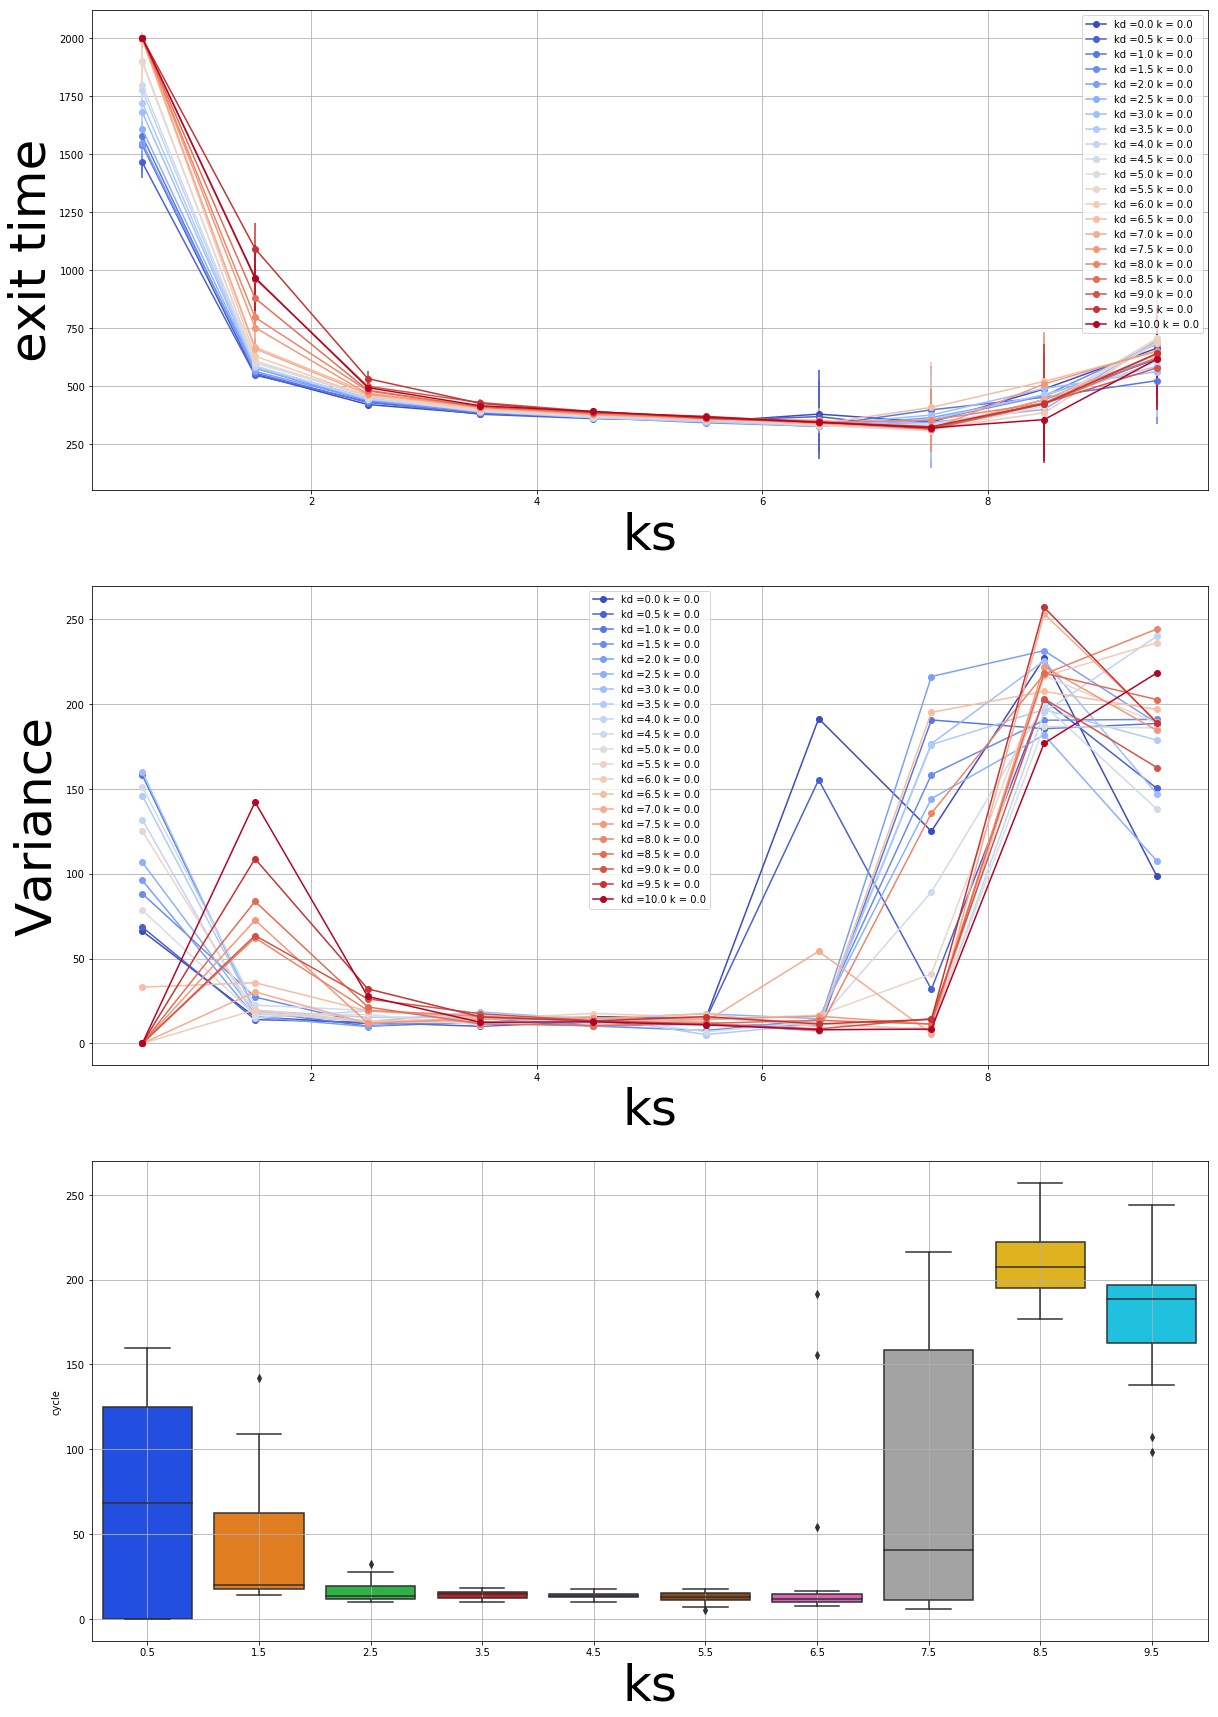

In [0]:
means_kd = data.groupby(by = ['kd', 'k','ks']).mean()
std_devs_kd = data.groupby(by = ['kd', 'k','ks']).std()

kds = list(means_kd.index.levels[0])
kss = list(means_kd.index.levels[2])
bets = list(means_kd.index.levels[1])

colors = cmap(kds/np.max(kds))

F , axes = subplots(3,1,figsize=(20,30))

for i in range(1):
    for j in range(len(kds)):
        axes[i*3].errorbar(kss,
                         means_kd['cycle'][kds[j]][bets[i]],
                         yerr=std_devs_kd['cycle'][kds[j]][bets[i]],
                         ecolor=[colors[j]],fmt='None',
                         label=None)
        axes[i*3].plot(kss,
                     means_kd['cycle'][kds[j]][bets[i]],
                     '-o',
                     label = 'kd ='+str(kds[j])+' k = '+str(bets[i]),
                     c=colors[j])
        
        axes[i*3+1].plot(kss,
                     std_devs_kd['cycle'][kds[j]][bets[i]],
                     '-o', 
                     label = 'kd ='+str(kds[j])+' k = '+str(bets[i]),
                     c=colors[j])
    
    
    axes[i*3].set_xlabel('ks', fontsize = 50)
    axes[i*3].set_ylabel('exit time', fontsize = 50)
    axes[i*3].legend(prop={'size': 10})
    axes[i*3].grid()

    axes[i*3+1].set_xlabel('ks', fontsize = 50)
    axes[i*3+1].set_ylabel('Variance', fontsize = 50)
    axes[i*3+1].legend(prop={'size': 10})
    axes[i*3+1].grid()
        
    sn.boxplot(x = 'ks',y='cycle',
               data=std_devs_kd.reset_index()[std_devs_kd.reset_index()['k']==bets[i]],
               palette='bright',ax=axes[i*3+2])

    axes[i*3+2].set_xlabel('ks', fontsize = 50)
    axes[i*3+2].grid()
